In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics, model_selection
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_excel('/content/drive/My Drive/SHRS_smallDS.xlsx',index_col=False)
print(df1.shape)


(30000, 17)


In [4]:
missing_values = df1.isnull().sum()

In [5]:
df_dropped = df1.dropna()

In [6]:
df1['Survival months'] = df1['Survival months'].replace('Unknown', 0).astype(int)

In [7]:
# Define the list of cancer types of interest
cancer_types_of_interest = ['Breast', 'Lung and Bronchus', 'Rectum', 'Prostate', 'Stomach']

# Filter the DataFrame
# The column name 'CancerType' should be replaced with the actual name of your column
data = df1[df1['Site recode ICD-O-3/WHO 2008'].isin(cancer_types_of_interest)]

# Now, 'filtered_data' contains only the records with the specified

In [8]:
# filter the dataset
def Survival(row):
    if (row['Survival months'] >= 60) and (row['Vital status recode (study cutoff used)'] == 'Alive'):
        return 1
    elif (row['Survival months'] < 60) and (row['SEER cause-specific death classification'] == 'Dead (attributable to this cancer dx)'):
        return 0
    else:
        data.drop(index=row.name, inplace=True)



data['Survived'] = data.apply(Survival, axis=1)
data[:5]

,Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Primary Site,Histologic Type ICD-O-3,Grade Recode (thru 2017),Marital status at diagnosis,Median household income inflation adj to 2021,Regional nodes examined (1988+),Regional nodes positive (1988+),SEER cause-specific death classification,Survival months,Vital status recode (study cutoff used),Age recode with <1 year olds,"Race recode (White, Black, Other)",Sex,Year of diagnosis,CS Tumor Size/Ext Eval (2004-2015),Survived
1,Rectum,Malignant,209,8140,Well differentiated; Grade I,Single (never married),"$75,000+",10,0,Dead (attributable to this cancer dx),49,Dead,65-69 years,White,Male,2000,Blank(s),0.0
4,Lung and Bronchus,Malignant,343,8012,Well differentiated; Grade I,Married (including common law),"$75,000+",1,1,Dead (attributable to this cancer dx),20,Dead,35-39 years,White,Female,1992,Blank(s),0.0
5,Breast,Malignant,506,8520,Moderately differentiated; Grade II,Divorced,"$75,000+",0,98,Dead (attributable to this cancer dx),14,Dead,75-79 years,White,Female,2003,Blank(s),0.0
6,Breast,Malignant,504,8520,Unknown,Single (never married),"$75,000+",20,0,Dead (attributable to this cancer dx),37,Dead,35-39 years,White,Female,1990,Blank(s),0.0
7,Breast,Malignant,504,8500,Poorly differentiated; Grade III,Married (including common law),"$75,000+",0,98,Dead (attributable to this cancer dx),26,Dead,55-59 years,White,Female,1991,Blank(s),0.0


In [9]:
import re

#get the first two interger from a string
def get_first_two_ints(s):
    numbers = re.findall(r'\d+', s)
    return [int(num) for num in numbers[:2]]

# convert to numerical form
data['Age'] = None
data['Income'] = None
data['Tumor Size'] = None
data['Grade Recode'] = None

GR = {'Unknown': 0,'Undifferentiated; anaplastic; Grade IV': 4, 'Poorly differentiated; Grade III': 3, 'Moderately differentiated; Grade II': 2, 'Well differentiated; Grade I': 1}

for index, row in data.iterrows():
    data.at[index, 'Age'] = data.at[index, 'Age recode with <1 year olds'][:2]
    data.at[index, 'Income'] = get_first_two_ints(data.at[index, 'Median household income inflation adj to 2021'])[0]
    if data.at[index, 'CS Tumor Size/Ext Eval (2004-2015)'] == 'Blank(s)':
        data.at[index, 'Tumor Size'] = 0
    else:
        data.at[index, 'Tumor Size'] = data.at[index, 'CS Tumor Size/Ext Eval (2004-2015)']
    data.at[index, 'Grade Recode'] = GR[data.at[index, 'Grade Recode (thru 2017)']]

data['Survived'] = data['Survived'].astype(int)
data['Age'] = data['Age'].astype(int)
data['Income'] = data['Income'].astype(int)
data['Tumor Size'] = data['Tumor Size'].astype(int)
data['Grade Recode'] = data['Grade Recode'].astype(int)
data

,Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Primary Site,Histologic Type ICD-O-3,Grade Recode (thru 2017),Marital status at diagnosis,Median household income inflation adj to 2021,Regional nodes examined (1988+),Regional nodes positive (1988+),SEER cause-specific death classification,...,Age recode with <1 year olds,"Race recode (White, Black, Other)",Sex,Year of diagnosis,CS Tumor Size/Ext Eval (2004-2015),Survived,Age,Income,Tumor Size,Grade Recode
1,Rectum,Malignant,209,8140,Well differentiated; Grade I,Single (never married),"$75,000+",10,0,Dead (attributable to this cancer dx),...,65-69 years,White,Male,2000,Blank(s),0,65,75,0,1
4,Lung and Bronchus,Malignant,343,8012,Well differentiated; Grade I,Married (including common law),"$75,000+",1,1,Dead (attributable to this cancer dx),...,35-39 years,White,Female,1992,Blank(s),0,35,75,0,1
5,Breast,Malignant,506,8520,Moderately differentiated; Grade II,Divorced,"$75,000+",0,98,Dead (attributable to this cancer dx),...,75-79 years,White,Female,2003,Blank(s),0,75,75,0,2
6,Breast,Malignant,504,8520,Unknown,Single (never married),"$75,000+",20,0,Dead (attributable to this cancer dx),...,35-39 years,White,Female,1990,Blank(s),0,35,75,0,0
7,Breast,Malignant,504,8500,Poorly differentiated; Grade III,Married (including common law),"$75,000+",0,98,Dead (attributable to this cancer dx),...,55-59 years,White,Female,1991,Blank(s),0,55,75,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,Lung and Bronchus,Malignant,341,8140,Well differentiated; Grade I,Widowed,"$75,000+",98,0,Dead (attributable to this cancer dx),...,55-59 years,White,Female,1991,Blank(s),0,55,75,0,1
29991,Stomach,Malignant,160,8140,Moderately differentiated; Grade II,Single (never married),"$75,000+",5,5,Dead (attributable to this cancer dx),...,65-69 years,White,Male,1991,Blank(s),0,65,75,0,2
29993,Lung and Bronchus,Malignant,342,8041,Undifferentiated; anaplastic; Grade IV,Divorced,"$70,000 - $74,999",0,98,Dead (attributable to this cancer dx),...,55-59 years,White,Female,1991,Blank(s),0,55,70,0,4
29997,Lung and Bronchus,Malignant,349,8140,Poorly differentiated; Grade III,Single (never married),"$70,000 - $74,999",0,98,Dead (attributable to this cancer dx),...,65-69 years,Black,Male,1991,Blank(s),0,65,70,0,3


In [10]:
# Initialize a dictionary to store the mappings
category_mappings = {}

# Manually encode each categorical column to numerical values
for column in data.select_dtypes(include=['object']):
    # Create a mapping for the current column
    categories = data[column].unique()
    mapping = {category: index for index, category in enumerate(categories)}
    category_mappings[column] = mapping

    # Replace the categorical values with numerical values
    data[column] = data[column].replace(mapping)

print("Encoded DataFrame:")
print(data)

print("\nCategory Mappings:")
for column, mapping in category_mappings.items():
    print(f"{column}: {mapping}")

Encoded DataFrame:
       Site recode ICD-O-3/WHO 2008  Behavior code ICD-O-3  Primary Site  \
1                                 0                      0           209   
4                                 1                      0           343   
5                                 2                      0           506   
6                                 2                      0           504   
7                                 2                      0           504   
...                             ...                    ...           ...   
29990                             1                      0           341   
29991                             3                      0           160   
29993                             1                      0           342   
29997                             1                      0           349   
29998                             1                      0           341   

       Histologic Type ICD-O-3  Grade Recode (thru 2017)  \
1       

In [11]:
data

,Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Primary Site,Histologic Type ICD-O-3,Grade Recode (thru 2017),Marital status at diagnosis,Median household income inflation adj to 2021,Regional nodes examined (1988+),Regional nodes positive (1988+),SEER cause-specific death classification,...,Age recode with <1 year olds,"Race recode (White, Black, Other)",Sex,Year of diagnosis,CS Tumor Size/Ext Eval (2004-2015),Survived,Age,Income,Tumor Size,Grade Recode
1,0,0,209,8140,0,0,0,10,0,0,...,0,0,0,2000,0,0,65,75,0,1
4,1,0,343,8012,0,1,0,1,1,0,...,1,0,1,1992,0,0,35,75,0,1
5,2,0,506,8520,1,2,0,0,98,0,...,2,0,1,2003,0,0,75,75,0,2
6,2,0,504,8520,2,0,0,20,0,0,...,1,0,1,1990,0,0,35,75,0,0
7,2,0,504,8500,3,1,0,0,98,0,...,3,0,1,1991,0,0,55,75,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,1,0,341,8140,0,3,0,98,0,0,...,3,0,1,1991,0,0,55,75,0,1
29991,3,0,160,8140,1,0,0,5,5,0,...,0,0,0,1991,0,0,65,75,0,2
29993,1,0,342,8041,4,2,1,0,98,0,...,3,0,1,1991,0,0,55,70,0,4
29997,1,0,349,8140,3,0,1,0,98,0,...,0,1,0,1991,0,0,65,70,0,3


In [12]:
# make a new data frame and store the useful attributes
final = data[['Site recode ICD-O-3/WHO 2008','Race recode (White, Black, Other)',
           'Sex',
           'Histologic Type ICD-O-3',
           'Regional nodes examined (1988+)',
           'Regional nodes positive (1988+)',
           'Primary Site',
           'Marital status at diagnosis',
           'Survived',
           'Age',
           'Income',
           'Tumor Size',
           'Grade Recode']]
final

,Site recode ICD-O-3/WHO 2008,"Race recode (White, Black, Other)",Sex,Histologic Type ICD-O-3,Regional nodes examined (1988+),Regional nodes positive (1988+),Primary Site,Marital status at diagnosis,Survived,Age,Income,Tumor Size,Grade Recode
1,0,0,0,8140,10,0,209,0,0,65,75,0,1
4,1,0,1,8012,1,1,343,1,0,35,75,0,1
5,2,0,1,8520,0,98,506,2,0,75,75,0,2
6,2,0,1,8520,20,0,504,0,0,35,75,0,0
7,2,0,1,8500,0,98,504,1,0,55,75,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,1,0,1,8140,98,0,341,3,0,55,75,0,1
29991,3,0,0,8140,5,5,160,0,0,65,75,0,2
29993,1,0,1,8041,0,98,342,2,0,55,70,0,4
29997,1,1,0,8140,0,98,349,0,0,65,70,0,3


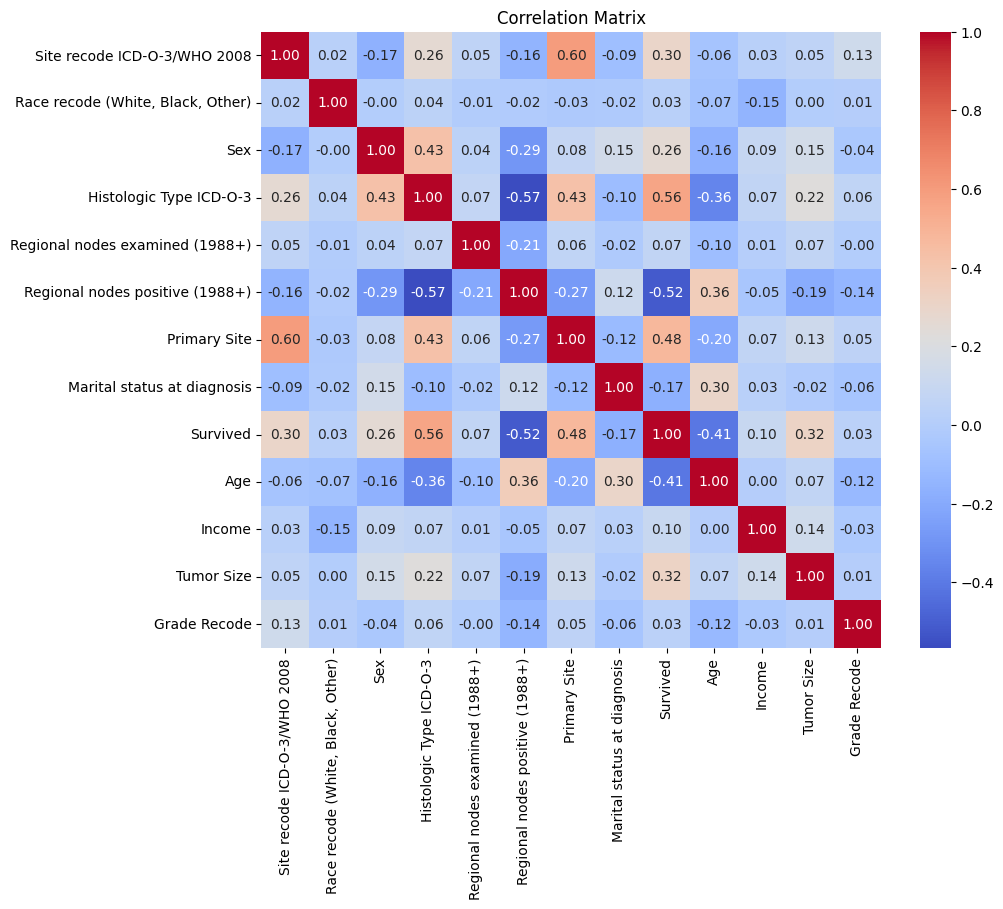

In [13]:
correlation_matrix = final.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title (optional)
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [14]:
X = final.drop('Survived', axis='columns')
X

,Site recode ICD-O-3/WHO 2008,"Race recode (White, Black, Other)",Sex,Histologic Type ICD-O-3,Regional nodes examined (1988+),Regional nodes positive (1988+),Primary Site,Marital status at diagnosis,Age,Income,Tumor Size,Grade Recode
1,0,0,0,8140,10,0,209,0,65,75,0,1
4,1,0,1,8012,1,1,343,1,35,75,0,1
5,2,0,1,8520,0,98,506,2,75,75,0,2
6,2,0,1,8520,20,0,504,0,35,75,0,0
7,2,0,1,8500,0,98,504,1,55,75,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
29990,1,0,1,8140,98,0,341,3,55,75,0,1
29991,3,0,0,8140,5,5,160,0,65,75,0,2
29993,1,0,1,8041,0,98,342,2,55,70,0,4
29997,1,1,0,8140,0,98,349,0,65,70,0,3


In [15]:
y = final['Survived']
y

1        0
4        0
5        0
6        0
7        0
        ..
29990    0
29991    0
29993    0
29997    0
29998    0
Name: Survived, Length: 10956, dtype: int64

In [28]:
sensitive_features_df= final[['Sex', 'Marital status at diagnosis', 'Race recode (White, Black, Other)', 'Income']]


In [29]:
X_train , X_test , y_train , y_test,sensitive_train,sensitive_test  = train_test_split(X, y,sensitive_features_df, test_size = 0.3, random_state=42)

In [18]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7669, 12)
y_train shape: (7669,)
X_test shape: (3287, 12)
y_test shape: (3287,)


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8573167021600243

In [21]:
pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 28.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvi

In [22]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate, demographic_parity_difference
from fairlearn.reductions import GridSearch, EqualizedOdds

In [23]:
# Define the fairness constraint
constraint = EqualizedOdds()

# Set up the GridSearch with the GaussianNB and the fairness constraint
gs = GridSearch(
    GaussianNB(),
    constraints=constraint,
    grid_size=10,
    grid_limit=2.0
)

# Fit the model with the training data and the sensitive feature
gs.fit(X_train, y_train, sensitive_features=sensitive_train)

# After fitting, the `predictors_` attribute of the `gs` object contains trained models
# Now, evaluate each model for both accuracy and the fairness metric
best_accuracy = 0
best_model = None
for model in gs.predictors_:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Compute your fairness metric here with the predictions
    # For example, we use demographic_parity_difference
    dpd = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)

    # Here we aim to find the model with the highest accuracy while having a dpd lower than a threshold
    # This threshold would be set based on your application
    dpd_threshold = 0.1
    if accuracy > best_accuracy and dpd < dpd_threshold:
        best_accuracy = accuracy
        best_model = model

# Now `best_model` is the model with the highest accuracy given the fairness constraint
best_accuracy, best_model

(0, None)

In [24]:
pip install fairlearn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from fairlearn.metrics import MetricFrame, selection_rate
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds


In [30]:
# Assume X and y are your features and labels, respectively, and sensitive_features_df contains your sensitive feature(s)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, sensitive_features_train, sensitive_features_test = train_test_split(
    X, y, sensitive_features_df, test_size=0.2, random_state=42
)

# Train the unmitigated Naive Bayes model
unmitigated_model = GaussianNB().fit(X_train, y_train)
y_pred_unmitigated = unmitigated_model.predict(X_test)

# Assess fairness of the unmitigated model
metric_frame_unmitigated = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'selection_rate': selection_rate
    },
    y_true=y_test,
    y_pred=y_pred_unmitigated,
    sensitive_features=sensitive_features_test
)

# Print metrics for the unmitigated model
print("Unmitigated Naive Bayes model metrics:")
print(metric_frame_unmitigated.by_group)

# Define and fit the mitigated model using ExponentiatedGradient and EqualizedOdds
mitigator = ExponentiatedGradient(
    estimator=GaussianNB(),
    constraints=EqualizedOdds()
)

mitigated_model = mitigator.fit(
    X_train, y_train,
    sensitive_features=sensitive_features_train
)

# Predict with the mitigated model
y_pred_mitigated = mitigated_model.predict(X_test)

# Assess fairness of the mitigated model
metric_frame_mitigated = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'selection_rate': selection_rate
    },
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=sensitive_features_test
)

# Print metrics for the mitigated model
print("Mitigated Naive Bayes model metrics:")
print(metric_frame_mitigated.by_group)

Unmitigated Naive Bayes model metrics:
                                                                          accuracy  \
Sex Marital status at diagnosis Race recode (White, Black, Other) Income             
0   0                           0                                 70      0.923077   
                                                                  75      0.821429   
                                1                                 70      1.000000   
                                                                  75      0.956522   
                                2                                 70      1.000000   
                                                                  75      0.500000   
    1                           0                                 70      0.951220   
                                                                  75      0.897561   
                                1                                 70      1.000000   
               

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from fairlearn.metrics import MetricFrame, selection_rate

# Compute fairness metrics for each group in the sensitive features for the unmitigated model
group_metrics_unmitigated = {}
for feature in sensitive_features_test.columns:
    metric_frame = MetricFrame(
        metrics={
            'accuracy': accuracy_score,
            'precision': precision_score,
            'recall': recall_score,
            'f1_score': f1_score,
            'selection_rate': selection_rate
        },
        y_true=y_test,
        y_pred=y_pred_unmitigated,
        sensitive_features=sensitive_features_test[feature]
    )
    group_metrics_unmitigated[feature] = metric_frame.by_group

# Compute fairness metrics for each group in the sensitive features for the mitigated model
group_metrics_mitigated = {}
for feature in sensitive_features_test.columns:
    metric_frame = MetricFrame(
        metrics={
            'accuracy': accuracy_score,
            'precision': precision_score,
            'recall': recall_score,
            'f1_score': f1_score,
            'selection_rate': selection_rate
        },
        y_true=y_test,
        y_pred=y_pred_mitigated,
        sensitive_features=sensitive_features_test[feature]
    )
    group_metrics_mitigated[feature] = metric_frame.by_group

# Now you can print or analyze the metrics for each group
# For example, to print them:
for feature in sensitive_features_test.columns:
    print(f"Metrics for {feature} (Unmitigated Model):")
    print(group_metrics_unmitigated[feature])
    print("\n")
    print(f"Metrics for {feature} (Mitigated Model):")
    print(group_metrics_mitigated[feature])
    print("------------------------------------------------------\n")


Metrics for Sex (Unmitigated Model):
     accuracy  precision    recall  f1_score  selection_rate
Sex                                                         
0    0.907059   0.695652  0.329897  0.447552        0.054118
1    0.830849   0.696141  0.919321  0.792315        0.463487


Metrics for Sex (Mitigated Model):
     accuracy  precision    recall  f1_score  selection_rate
Sex                                                         
0    0.718824   0.145000  0.298969  0.195286        0.235294
1    0.600596   0.391304  0.248408  0.303896        0.222802
------------------------------------------------------

Metrics for Marital status at diagnosis (Unmitigated Model):
                             accuracy  precision    recall  f1_score  \
Marital status at diagnosis                                            
0                            0.825545   0.698413  0.830189  0.758621   
1                            0.860387   0.744472  0.830137  0.784974   
2                            0.84

In [32]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from fairlearn.metrics import MetricFrame, selection_rate

# Define the metrics you want to compute
metrics_dict = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1_score': f1_score,
    'selection_rate': selection_rate
}

# Initialize an empty DataFrame for the summaries
summary_df = pd.DataFrame()

# Compute the metrics for each group in the sensitive features for both models
for feature in sensitive_features_test.columns:
    # Unmitigated model
    metric_frame_unmitigated = MetricFrame(
        metrics=metrics_dict,
        y_true=y_test,
        y_pred=y_pred_unmitigated,
        sensitive_features=sensitive_features_test[feature]
    )

    # Mitigated model
    metric_frame_mitigated = MetricFrame(
        metrics=metrics_dict,
        y_true=y_test,
        y_pred=y_pred_mitigated,
        sensitive_features=sensitive_features_test[feature]
    )

    # Create a temporary DataFrame with the results for this feature
    feature_summary_df = pd.DataFrame({
        f'{feature}_unmitigated': metric_frame_unmitigated.by_group.mean(),
        f'{feature}_mitigated': metric_frame_mitigated.by_group.mean()
    })

    # Concatenate the temporary DataFrame with the summary DataFrame
    summary_df = pd.concat([summary_df, feature_summary_df], axis=1)

# Transpose the DataFrame for better readability if needed
summary_df = summary_df.T

# Print the summary DataFrame
print(summary_df)


                                               accuracy  precision    recall  \
Sex_unmitigated                                0.868954   0.695897  0.624609   
Sex_mitigated                                  0.659710   0.268152  0.273688   
Marital status at diagnosis_unmitigated        0.842385   0.641331  0.757550   
Marital status at diagnosis_mitigated          0.650460   0.266216  0.212557   
Race recode (White, Black, Other)_unmitigated  0.862408   0.694909  0.818643   
Race recode (White, Black, Other)_mitigated    0.650684   0.321801  0.284629   
Income_unmitigated                             0.886486   0.694326  0.796596   
Income_mitigated                               0.678950   0.232449  0.243742   

                                               f1_score  selection_rate  
Sex_unmitigated                                0.619934        0.258802  
Sex_mitigated                                  0.249591        0.229048  
Marital status at diagnosis_unmitigated        0.687609  

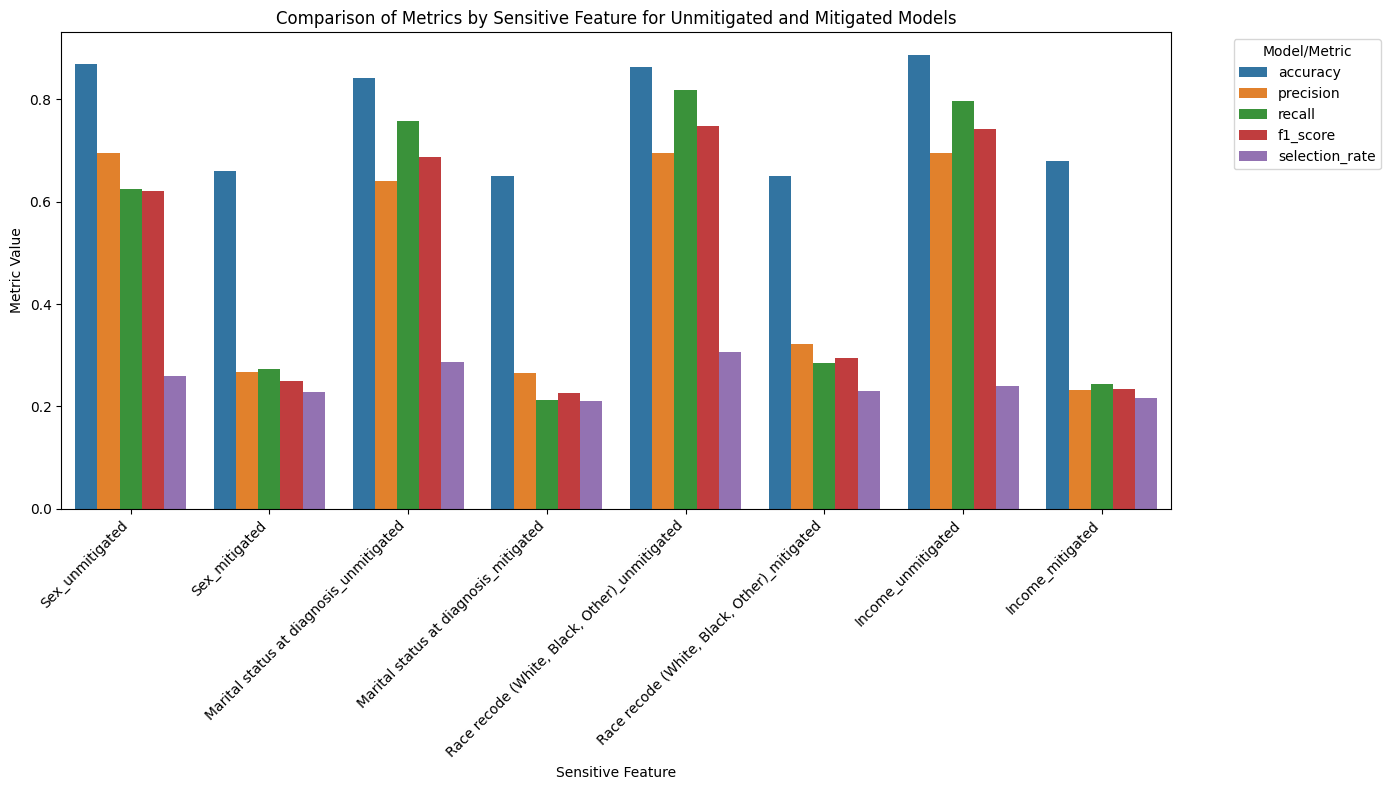

In [33]:


# Assuming summary_df is already created as per the previous code snippet

# Since we transposed the summary DataFrame, each column represents a metric for the unmitigated/mitigated model,
# and each row represents a sensitive feature.

# Reset index to use default integer index and turn 'index' into a column for plotting
summary_df_reset = summary_df.reset_index()

# Melt the DataFrame to long-format for seaborn to plot
summary_df_melted = summary_df_reset.melt(id_vars='index', var_name='Model_Metric', value_name='Value')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=summary_df_melted, x='index', y='Value', hue='Model_Metric')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sensitive Feature')
plt.ylabel('Metric Value')
plt.title('Comparison of Metrics by Sensitive Feature for Unmitigated and Mitigated Models')
plt.legend(title='Model/Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()